#                                           _Customer Churn Prediction

##  Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


##  Loading the Dataset

In [35]:
data = pd.read_csv("Customer Churn Prediction.csv")
data

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,47,Sci-Fi,3.697451,1,Male,8,Yes,No,FBZ38J108Z,0
243783,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,35,Comedy,1.449742,4,Male,20,No,No,W4AO1Y6NAI,0
243784,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,44,Action,4.012217,6,Male,13,Yes,Yes,0H3SWWI7IU,0
243785,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,36,Fantasy,2.135789,7,Female,5,No,Yes,63SJ44RT4A,0


## Top 5 rows

In [36]:
data.head()


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


## Info of dataset

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

## Columns of Dataset

In [38]:
data.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

## Statistical Info

In [39]:
data.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [40]:
data.shape

(243787, 21)

## Handling Missing Values

In [41]:
data.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

## Handling Duplicates

In [42]:
data.duplicated().sum()

np.int64(0)

## Checking Outliers via Box Plot

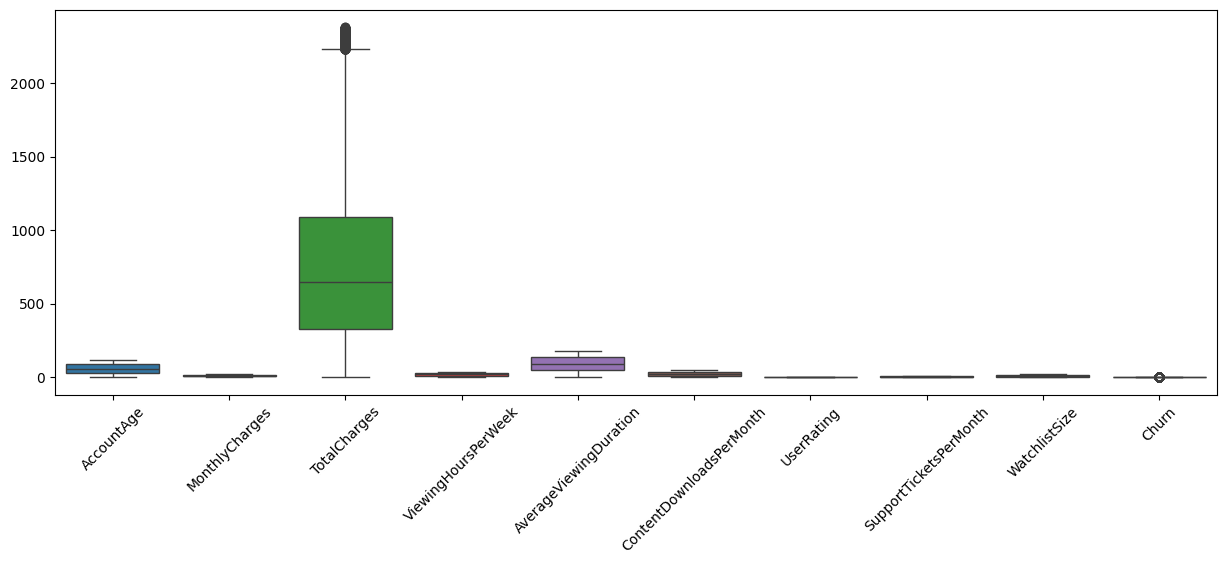

In [43]:
plt.figure(figsize=(15, 5))
sns.boxplot(data)
plt.xticks(rotation=45) 
plt.show()

## Handling Outliers

In [44]:
## handling outliers in (Total CHarges)
# calculate the q1,q3,iqr

q1 = data['TotalCharges'].quantile(0.25)
q3 = data['TotalCharges'].quantile(0.75)
iqr = q3-q1

lowerbound = q1-1.0 * iqr
upperbound = q3+1.0 * iqr

outliers_Total_charges = data[(data['TotalCharges'] < lowerbound) | (data['TotalCharges'] > upperbound )]


In [45]:

remove_outliers_Totalcharges = data[(data['TotalCharges']>= lowerbound) & (data['TotalCharges']<= upperbound)]


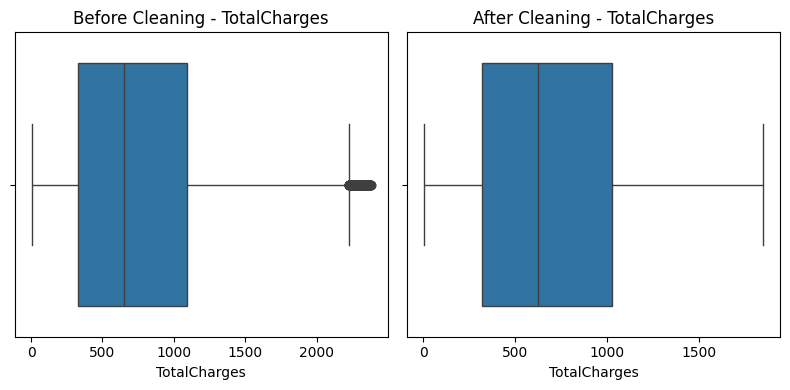

In [46]:
plt.figure(figsize=(8, 4))


# Subplot 1 - Before Cleaning
plt.subplot(1, 2, 1)
sns.boxplot(x=data['TotalCharges'])
plt.title("Before Cleaning - TotalCharges")

# Subplot 2 - After Cleaning
plt.subplot(1, 2, 2)
sns.boxplot(x=remove_outliers_Totalcharges['TotalCharges'])
plt.title("After Cleaning - TotalCharges")

plt.tight_layout()
plt.show()


## Understand insights from the data:
### Visualizations:

### CountPlot

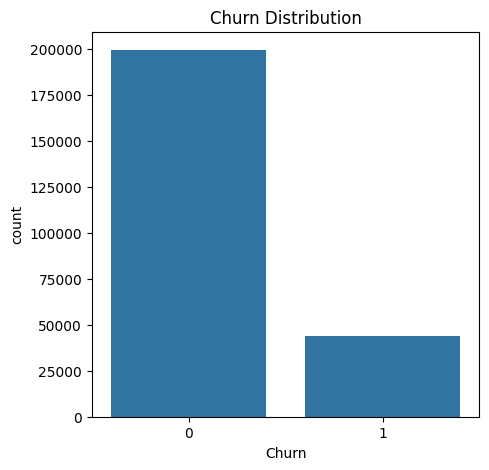

In [47]:
plt.figure(figsize=(5,5))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

## Stacked Bar Chart 

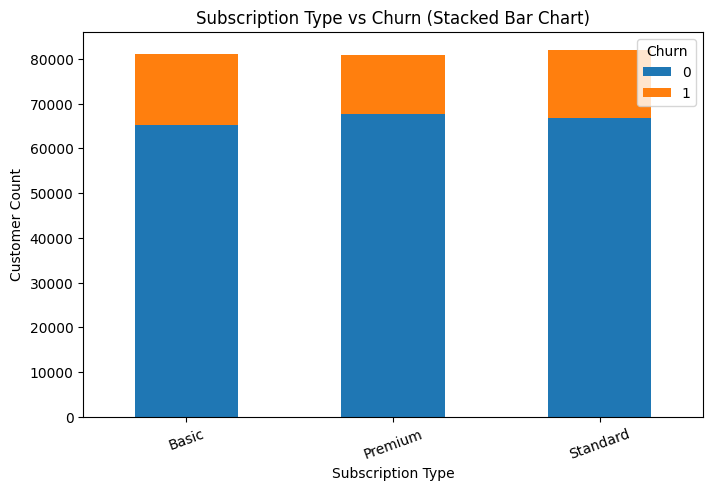

In [48]:
# Prepare data for stacked chart
stack_data = pd.crosstab(data['SubscriptionType'], data['Churn'])

# Plot
stack_data.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Subscription Type vs Churn (Stacked Bar Chart)")
plt.xlabel("Subscription Type")
plt.ylabel("Customer Count")
plt.legend(title="Churn")
plt.xticks(rotation=20)
plt.show()


### Histogram

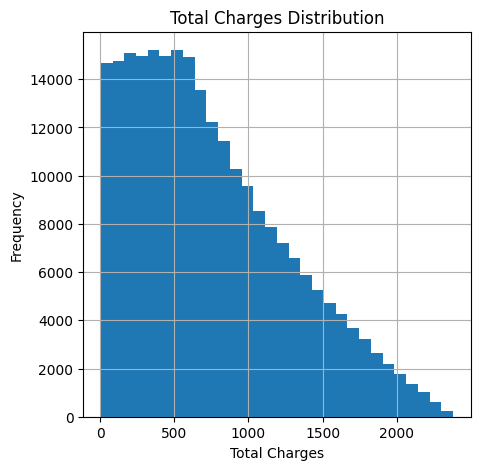

In [49]:
data['TotalCharges'].hist(bins=30, figsize=(5,5))
plt.title("Total Charges Distribution")
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.show()

### Correlation Heatmap

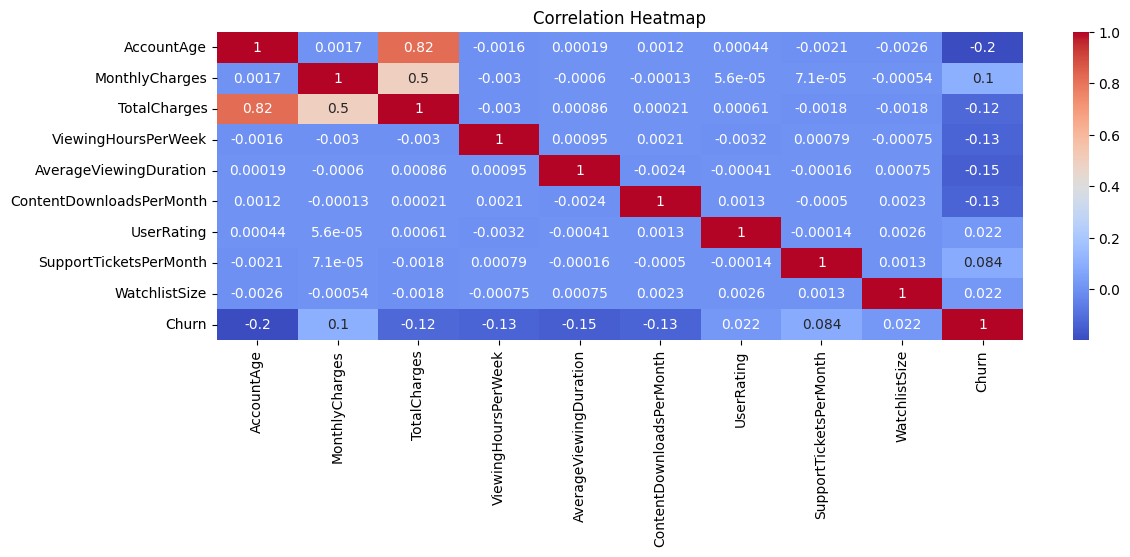

In [50]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(13,4))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

 ## Violin Plot: Monthly Charges vs Churn

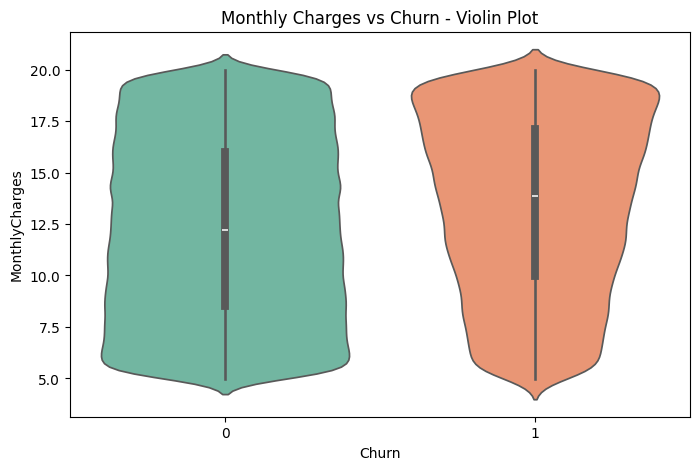

In [51]:
plt.figure(figsize=(8,5))
sns.violinplot(data=data, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title("Monthly Charges vs Churn - Violin Plot")
plt.show()

## Pie Chart

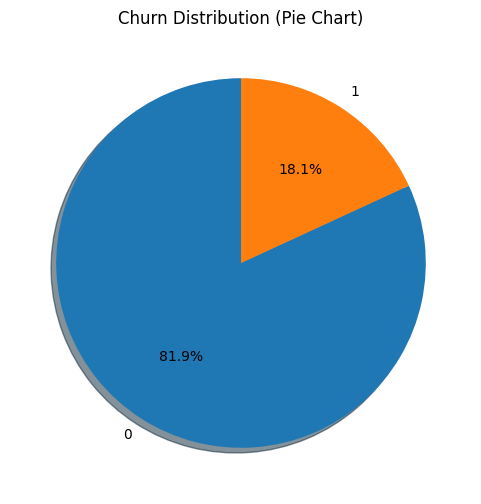

In [52]:
plt.figure(figsize=(6,6))
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Churn Distribution (Pie Chart)")
plt.ylabel("")
plt.show()


# Model Bulding 
#### * Split data into features (X) and target (y)
#### * Split the data into training and testing
#### * Build each ML model
#### * Fit the model on training data
#### * Make predictions on test data
#### * Evaluate model performance

In [53]:
# Drop ID column
data = data.drop(columns=["CustomerID"])

In [54]:
# Split features and target
X = data.drop("Churn", axis=1)
y = data["Churn"]

# Identify columns
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [55]:
# ENCODING 
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoded_cat = encoder.fit_transform(X[cat_cols]).toarray()

# Combine numeric + encoded categorical
X_encoded = np.hstack((X[num_cols].values, encoded_cat))

# SCALING 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [56]:
#TRAIN TEST SPLIT 
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)

## Logistic Regression

Logistic Regression Accuracy:	 0.8253004635136798

Classification Report:                precision    recall  f1-score   support

           0       0.84      0.98      0.90     39968
           1       0.57      0.12      0.20      8790

    accuracy                           0.83     48758
   macro avg       0.70      0.55      0.55     48758
weighted avg       0.79      0.83      0.78     48758


Confusion Matrix: [[39164   804]
 [ 7714  1076]]


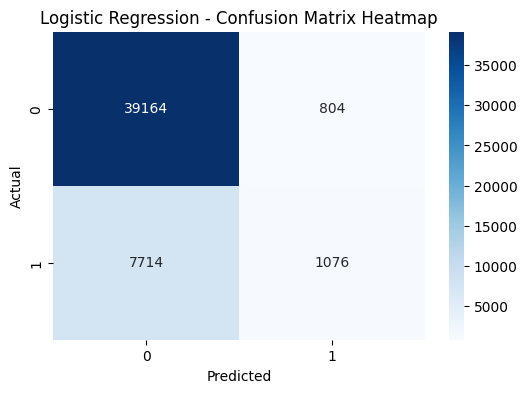

In [57]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("Logistic Regression Accuracy:\t", accuracy_score(y_test, log_pred))
print("\nClassification Report: ", classification_report(y_test, log_pred))
print("\nConfusion Matrix:", confusion_matrix(y_test, log_pred))
cm =confusion_matrix(y_test, log_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Random Forest 

Random Forest Accuracy: 0.8226957627466261
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.99      0.90     39968
           1       0.56      0.08      0.14      8790

    accuracy                           0.82     48758
   macro avg       0.69      0.53      0.52     48758
weighted avg       0.78      0.82      0.76     48758

\Confusion Matrix:
 [[39405   563]
 [ 8082   708]]


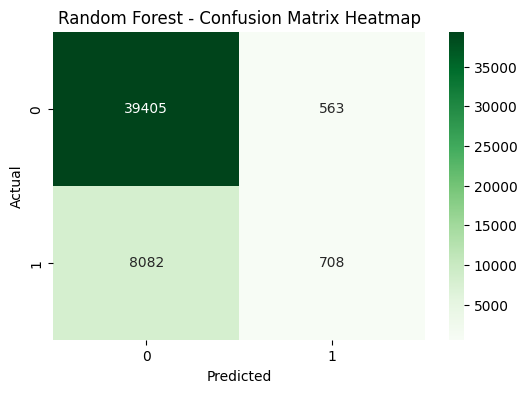

In [58]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report: ", classification_report(y_test, rf_pred))
print("\Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Gradient Boosting

Gradient Boosting Accuracy: 0.8243365191353214
Classification_Report:                precision    recall  f1-score   support

           0       0.83      0.98      0.90     39968
           1       0.58      0.09      0.16      8790

    accuracy                           0.82     48758
   macro avg       0.70      0.54      0.53     48758
weighted avg       0.79      0.82      0.77     48758


Confusion Matrix:
 [[39360   608]
 [ 7957   833]]


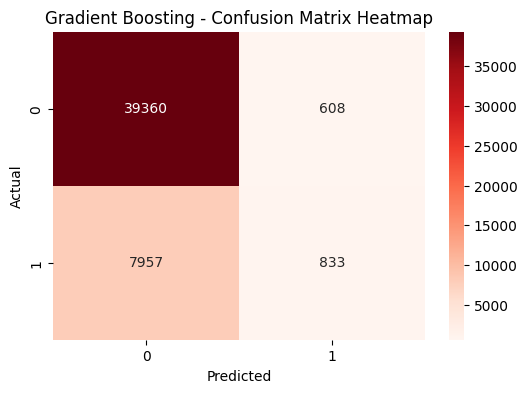

In [59]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Classification_Report: ", classification_report(y_test, gb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, gb_pred))

cm = confusion_matrix(y_test, gb_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Gradient Boosting - Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Naive Bayes

Naive Bayes Accuracy: 0.8229418762049304

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     39968
           1       0.53      0.16      0.24      8790

    accuracy                           0.82     48758
   macro avg       0.68      0.56      0.57     48758
weighted avg       0.78      0.82      0.78     48758


Naive Bayes Confusion Matrix:
 [[38756  1212]
 [ 7421  1369]]


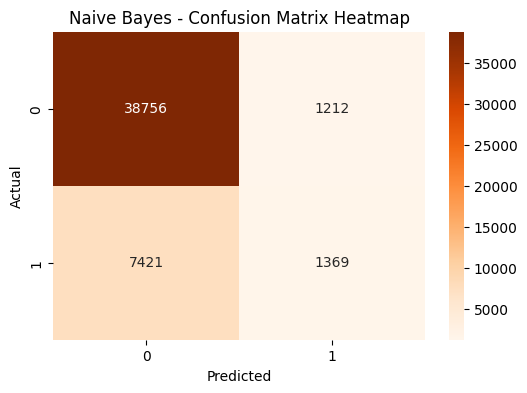

In [60]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, nb_pred))
print("\nNaive Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))

cm = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Naive Bayes - Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Decision Tree

Decision Tree Accuracy: 0.7271627220148489

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     39968
           1       0.27      0.30      0.28      8790

    accuracy                           0.73     48758
   macro avg       0.56      0.56      0.56     48758
weighted avg       0.74      0.73      0.73     48758


Decision Tree Confusion Matrix:
 [[32838  7130]
 [ 6173  2617]]


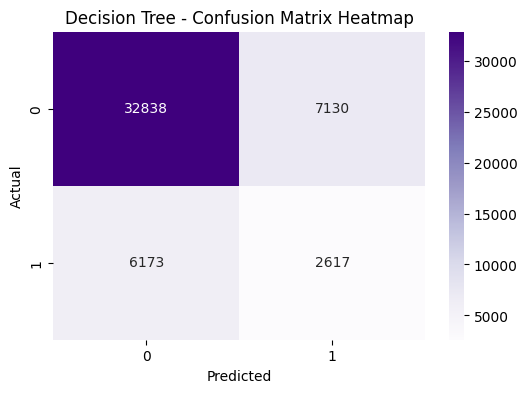

In [61]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_pred))
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Decision Tree - Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## XGBoost

XGBoost Accuracy: 0.8214241765453875

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     39968
           1       0.52      0.13      0.21      8790

    accuracy                           0.82     48758
   macro avg       0.68      0.55      0.55     48758
weighted avg       0.78      0.82      0.77     48758


XGBoost Confusion Matrix:
 [[38910  1058]
 [ 7649  1141]]


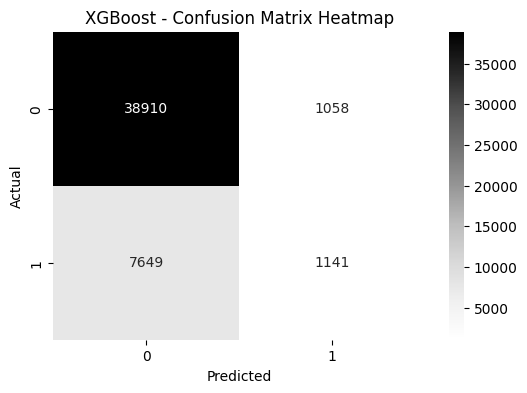

In [62]:
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_pred))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))

cm = confusion_matrix(y_test, xgb_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
plt.title("XGBoost - Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Accuracy comparison 

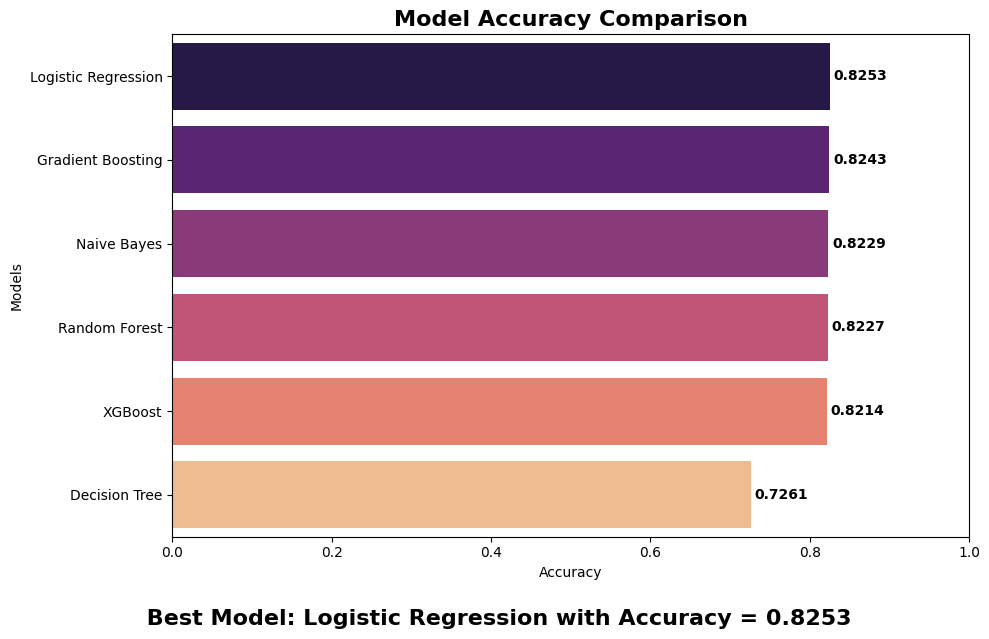

In [65]:
accuracy_results = {
    "Logistic Regression": 0.8253004635136798,
    "Random Forest": 0.8226957627466261,
    "Gradient Boosting" : 0.8243365191353214,
    "Naive Bayes": 0.8229418762049304,
    "XGBoost": 0.8214241765453875,
    "Decision Tree": 0.726096230362197
}

accuracy_results = dict(sorted(accuracy_results.items(), key=lambda item: item[1], reverse=True))

# Plotting horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=list(accuracy_results.values()), y=list(accuracy_results.keys()), palette="magma")

# Add accuracy labels on bars
for i, (model, acc) in enumerate(accuracy_results.items()):
    plt.text(acc + 0.005, i, f"{acc:.4f}", va='center', fontweight='bold')

# Find best model
best_model = max(accuracy_results, key=accuracy_results.get)
best_accuracy = accuracy_results[best_model]

plt.xlim(0,1)
plt.title("Model Accuracy Comparison", fontsize=16, fontweight='bold')
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.figtext(0.5, -0.05, f" Best Model: {best_model} with Accuracy = {accuracy_results[best_model]:.4f}",
            ha='center', fontsize=16, fontweight='bold', color='black')
plt.tight_layout()
plt.show()

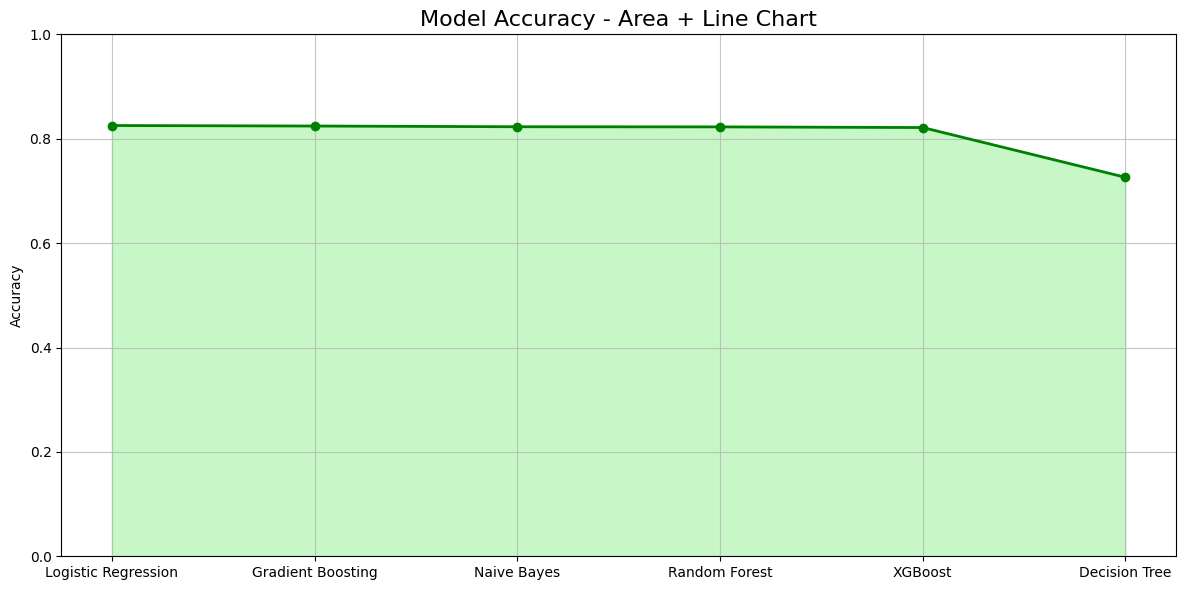

In [64]:
plt.figure(figsize=(12,6))
models = list(accuracy_results.keys())
acc = list(accuracy_results.values())

plt.plot(models, acc, marker='o', linewidth=2, color='green')
plt.fill_between(models, acc, color='lightgreen', alpha=0.5)
plt.ylim(0,1)
plt.title("Model Accuracy - Area + Line Chart", fontsize=16)
plt.ylabel("Accuracy")
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()
